In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [10]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data() 
X_train.shape, y_train.shape, X_test.shape, y_test.shape
# Converting y to 1D array
y_train = y_train.reshape(-1,)

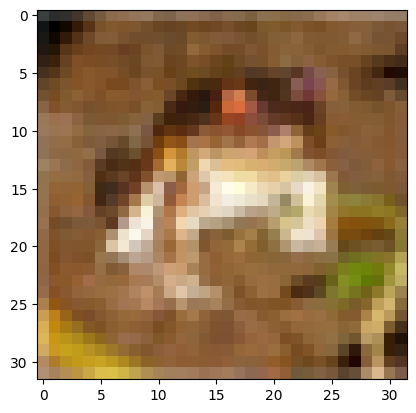

In [9]:
plt.imshow(X_train[0])

In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [11]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(class_names[y[index]])

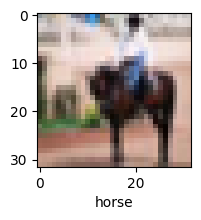

In [12]:
plot_sample(X_train, y_train, 11)

In [ ]:
#Scaling the RGB values

X_train = X_train / 255
X_test = X_test / 255

In [14]:
ann = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.1023 - loss: nan
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.0985 - loss: nan
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.1003 - loss: nan
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 37ms/step - accuracy: 0.1003 - loss: nan
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.0987 - loss: nan


In [16]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.10      1.00      0.18      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [18]:
cnn = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.2916 - loss: 3.9524
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.5074 - loss: 1.3769
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.5964 - loss: 1.1635
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.6398 - loss: 1.0458
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.6624 - loss: 0.9695
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.6901 - loss: 0.9003
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.7050 - loss: 0.8516
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.7267 - loss: 0.7936
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7413 - loss: 0.7464
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.7523 - loss: 0.7148


In [19]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6435 - loss: 1.1135


[1.1308571100234985, 0.6424999833106995]

In [20]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

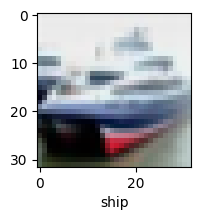

In [21]:
plot_sample(X_test, y_test, 1)

In [22]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


array([[3.82829130e-05, 1.64991179e-05, 2.87456810e-03, 9.33252156e-01,
        4.46486092e-06, 9.56244022e-03, 5.27718365e-02, 3.92166513e-08,
        1.47706922e-03, 2.75344019e-06],
       [1.08866222e-01, 5.39243594e-02, 1.57705358e-06, 3.12735381e-07,
        2.35999202e-08, 5.20350985e-10, 9.95117807e-06, 2.88261447e-07,
        8.37032795e-01, 1.64421101e-04],
       [5.40831685e-01, 1.02074161e-01, 2.79527679e-02, 1.79775953e-02,
        2.23142328e-03, 6.40713319e-04, 2.91186534e-02, 3.94177949e-03,
        2.46786967e-01, 2.84442026e-02],
       [9.96243298e-01, 7.07080835e-06, 3.05360206e-03, 1.45971444e-06,
        4.31149994e-04, 1.13406486e-07, 1.42118733e-05, 6.38822897e-08,
        2.44989467e-04, 4.04362117e-06],
       [3.55485536e-05, 5.03684942e-06, 3.51790972e-02, 2.12361552e-02,
        1.25784233e-01, 8.70416593e-03, 8.08934450e-01, 1.07015745e-04,
        1.04754636e-05, 3.83378119e-06]], dtype=float32)

In [25]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 0, 0, 6]

In [26]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [27]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.60      0.76      0.67      1000
           1       0.84      0.72      0.77      1000
           2       0.48      0.62      0.54      1000
           3       0.44      0.49      0.46      1000
           4       0.60      0.55      0.57      1000
           5       0.61      0.47      0.53      1000
           6       0.71      0.77      0.74      1000
           7       0.75      0.63      0.68      1000
           8       0.75      0.72      0.74      1000
           9       0.76      0.71      0.73      1000

    accuracy                           0.64     10000
   macro avg       0.65      0.64      0.64     10000
weighted avg       0.65      0.64      0.64     10000

